<a id="3"></a>
<font color="blue" size=+2.5><b>2.1 Installation of Libraries </b></font>

## !pip install fastai

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [4]:
# installing required libraries
%pip install fastai
%pip install opencv-python

from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Had to Change a few things....

### from torchvision.models.utils import load_state_dict_from_url
### to
### from torch.hub import load_state_dict_from_url

### manually in the folder (~/.conda/envs/fastai_env/lib/site-packages/fastai/vision/models/xresnet.py
)

<a id="5"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

## Use "from pathlib import Path" for Path not found also use "\\" for importing from local computer

In [5]:
from pathlib import Path
x  = "C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train"
path = Path(x)
path.ls()

(#7) [Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/.ipynb_checkpoints'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/buildings'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/forest'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/glacier'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/mountain'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/sea'),Path('C:/Users/ACER/anaconda3/Projects 13th July 2025/Machine Learning/Image Classification with CNN/seg_train/street')]

<a id="6"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

## I had to change 'ImageDataBunch to ImageDataLoaders as it doesn't work with the Torch version 2.7.1 and Torchvision version 0.22.1'

In [6]:
bad_files = verify_images(get_image_files(path))
print(f"Found {len(bad_files)} corrupted or unreadable files.")
batch_tfms = Normalize.from_stats(*imagenet_stats)
np.random.seed(40)
data = ImageDataLoaders.from_folder(
    path, train = '.',
    valid_pct=0.2,
    item_tfms=Resize(224), num_workers=4, 
    batch_tfms=aug_transforms()
)

#data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
#                                  ds_tfms=aug_transforms(), size=224,
#                                  num_workers=4).normalize(imagenet_stats)

Found 0 corrupted or unreadable files.


<a id="7"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

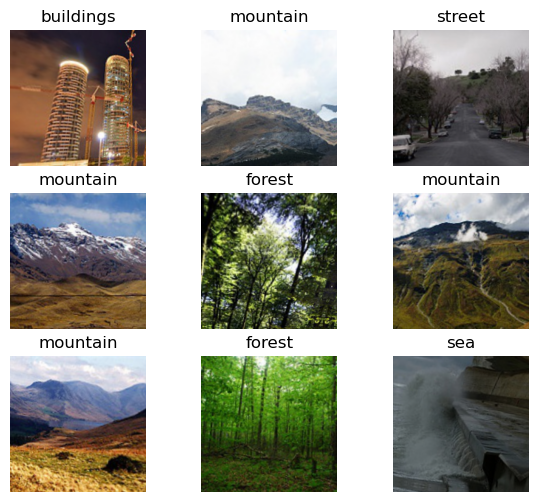

In [8]:
data.show_batch(figsize=(7,6))

#data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

<a id="8"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [9]:
data

In [11]:
print(data.vocab)        # Shows all class labels
len(data.vocab)          # Number of unique classes
data.c                   # Still works as before

# print(data.classes)
# len(data.classes)
# data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [12]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

d:\Anaconda3\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ACER/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:05<00:00, 7.98MB/s]


In [14]:
print(type(learn.recorder))

# To study the call of the recorder object

<class 'fastai.learner.Recorder'>


<a id="10"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

AttributeError: 'Sequential' object has no attribute 'plot'

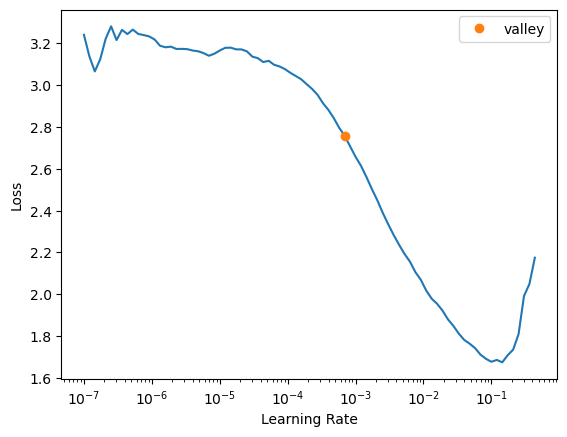

In [15]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

<a id="11"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [16]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.422011,0.342043,0.887028,30:13


KeyboardInterrupt: 

<a id="12"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>


In [17]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.266735,0.231390,0.930862,34:53
1,0.251818,0.222640,0.936565,35:01
2,0.243171,0.293541,0.915538,36:10


KeyboardInterrupt: 

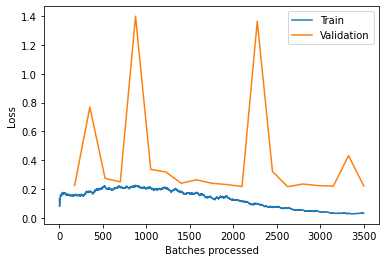

In [ ]:
learn.recorder.plot_losses()

# <a id="13"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>

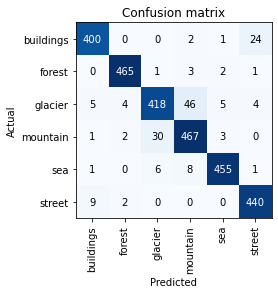

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

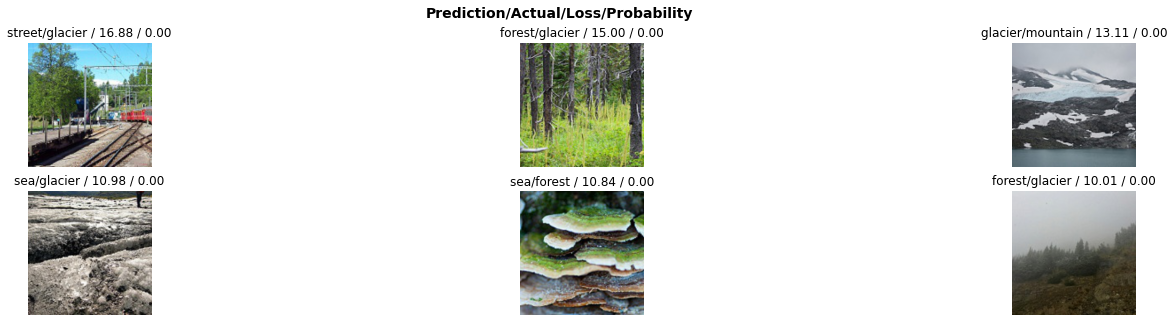

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="14"></a>
<font color="blue" size=+2.5><b>5.2 Prediction Using Trained Model</b></font>

In [ ]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


<a id="15"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>

In [ ]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')